# WEEK 4 - LAB EXERCISES


# Introduction

In this lab, we will learn more about the machine learning pipeline, including examining and performing basic data cleaning. We then examine how to perform logistic regression, learn two basic metrics to evaluate this (we will cover more metrics in this week’s lecture) and perform basic parameter tuning to demonstrate how it can be done. We will apply it to predicting whether NBA rookies will play five years or more.

# Dataset

In this lab, we will be using a dataset of NBA rookies, some of their stats and trying to predict whether they will still be playing after 5 years. 

# Data Preprocessing

We will first study how to perform some basic data pre-processing. **First import pandas, sklearn, numpy and matplotlib.pyplot. You may also want to import seaborn for drawing more beautiful graphs.**

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import warnings
warnings.filterwarnings('ignore')

Next, we want to load the dataset `nbaPlayers.csv` into a Pandas dataframe (call it `nbaDf`). Remember to check if your dataframe was loaded correctly by print out the first few records or output some summary information about the dataset.

In [2]:
nbaDf = pd.read_csv('nbaRookies.csv')
nbaDf.head()

,Name,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,1.6,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0.0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,2.6,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0.0
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,0.9,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0.0
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,0.9,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1.0
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,1.3,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1.0


**Let's plot a series of histogram to understand the distribution of the data more. Is there anything that captures your interest?**

> *ANSWER: Hist plots do not include `Name` feature*

<Figure size 432x288 with 0 Axes>

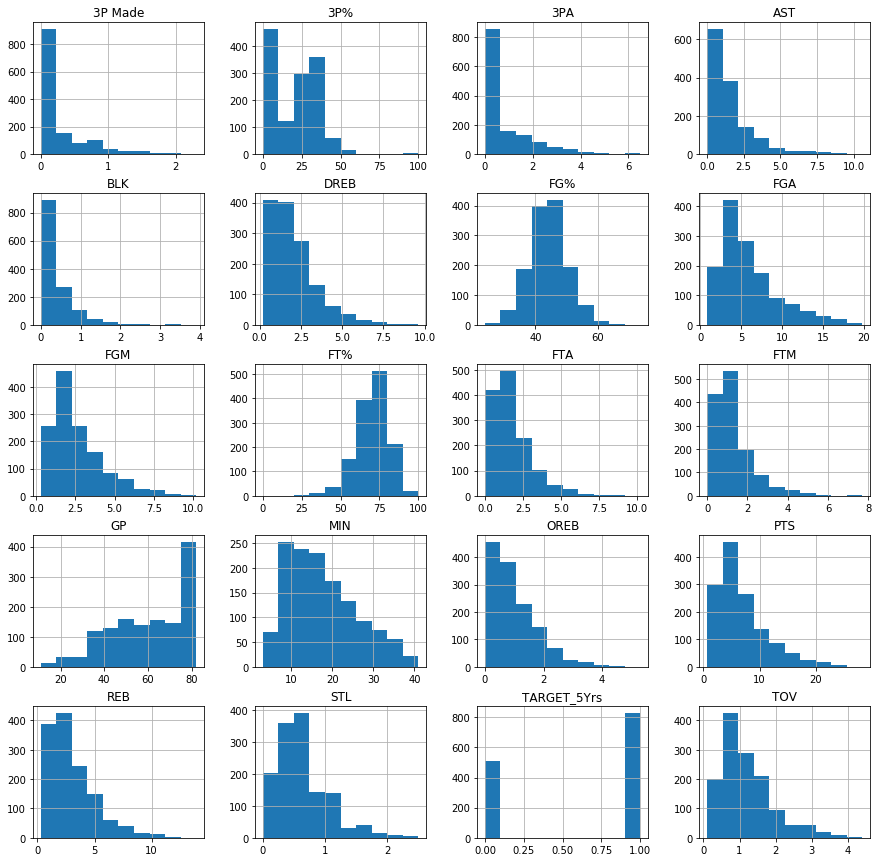

In [3]:
plt.figure()
nbaDf.hist(figsize = (15, 15))
plt.show()

If we tried to run this with a classifier, we will find it will complaint about NaN values. What NaN values generally mean is that there were missing values in the loaded data. Let's examine them:

In [4]:
pd.isna(nbaDf).sum()

Name            0
GP              0
MIN             0
PTS             0
FGM             0
FGA             0
FG%             0
3P Made         0
3PA             0
3P%            11
FTM             0
FTA             0
FT%             0
OREB            0
DREB            0
REB             0
AST             0
STL             0
BLK             0
TOV             0
TARGET_5Yrs     0
dtype: int64

That outputs the whole dataframe and entries with True means the value is NaN or None. Given the size of the dataframe, it is hard to visualise it. Please check up the reference for `isna()` at https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.isna.html (Links to an external site.)Links to an external site..

Knowing that the function `isna()` produces a dataframe, **can you find a way to summarise how many rows that contain missing data? What are the column(s) that contain missing data, and how many rows? Next, slice the nbaDf dataframe to examine the rows that have missing data.**

In [5]:
nbaDf[nbaDf.isna().any(axis = 1)]

,Name,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
338,Ken Johnson,64,12.7,4.1,1.8,3.3,52.8,0.0,0.0,NaN,0.6,1.3,43.5,1.4,2.4,3.8,0.3,0.2,0.3,0.9,0.0
339,Ken Johnson,64,12.7,4.1,1.8,3.3,52.8,0.0,0.0,NaN,0.6,1.3,43.5,1.4,2.4,3.8,0.3,0.2,0.3,0.9,0.0
340,Pete Williams,53,10.8,2.8,1.3,2.1,60.4,0.0,0.0,NaN,0.3,0.8,42.5,0.9,1.9,2.8,0.3,0.4,0.4,0.4,0.0
358,Melvin Turpin,79,24.7,10.6,4.6,9.0,51.1,0.0,0.0,NaN,1.4,1.8,78.4,2.0,3.8,5.7,0.5,0.5,1.1,1.5,1.0
386,Jim Petersen,60,11.9,3.2,1.2,2.4,48.6,0.0,0.0,NaN,0.8,1.1,75.8,0.7,1.7,2.5,0.5,0.2,0.5,1.2,1.0
397,Tom Scheffler,39,6.9,1.3,0.5,1.3,41.2,0.0,0.0,NaN,0.3,0.5,50.0,0.5,1.5,1.9,0.3,0.2,0.3,0.4,0.0
507,Sam Williams,59,18.2,6.1,2.6,4.7,55.6,0.0,0.0,NaN,0.8,1.5,55.1,1.5,3.7,5.2,0.6,0.8,1.3,1.1,0.0
509,Kurt Nimphius,63,17.2,5.3,2.2,4.7,46.1,0.0,0.0,NaN,1.0,1.7,58.3,1.5,3.2,4.7,1.0,0.3,1.3,0.9,1.0
510,Pete Verhoeven,71,17.0,4.9,2.1,4.2,50.3,0.0,0.0,NaN,0.7,1.0,70.8,1.5,2.1,3.6,0.7,0.6,0.3,0.8,1.0
521,Jim Smith,72,11.9,2.9,1.2,2.3,50.9,0.0,0.0,NaN,0.5,1.2,45.9,1.0,1.5,2.5,0.6,0.3,0.7,0.7,0.0


There are several ways to deal with this, but in this case, we can set the missing data to zeros. **Please use the built-in function `fillna()` of pandas to do this.**

In [6]:
nbaDf.fillna(0, inplace = True)
nbaDf.isna().sum()

Name           0
GP             0
MIN            0
PTS            0
FGM            0
FGA            0
FG%            0
3P Made        0
3PA            0
3P%            0
FTM            0
FTA            0
FT%            0
OREB           0
DREB           0
REB            0
AST            0
STL            0
BLK            0
TOV            0
TARGET_5Yrs    0
dtype: int64

This essentially fills all NaN entries with 0 (remember to check the documentation for details of the method). There is another useful function to deal with NaN and missing values called interpolate, that tries to infer values – again check the documentation for details. Another option is to drop the row/instance if it appears the instance might be erroneous or there is no good way to fill or infer.

The final task in this section is to set up the feature/attribute data and the column we are predicting `TARGET_5Yrs`. We have done this in the previous lab, please do that now. Name the X/input variable `nbaFeatDf` and the Y/target variable `nbaLabelsDf`.

In [7]:
nbaFeatDf = nbaDf.drop(['TARGET_5Yrs', 'Name'], axis = 1)
nbaLabelsDf = nbaDf['TARGET_5Yrs']

# Setting up training and testing data

Similar to last week (and we’ll discuss in lectures about evaluation), we will divide our data into a number of testing datasets.

What we want to do is to use the training (data)set to construct the model, then use the validation set to tune the parameters of the model. Then once the parameters + model are tuned, we evaluate it on the testing set. This reduces the risk that we overfit if we use the testing set to tune the parameters (something we will talk about in lectures).

Scikit-learn doesn’t have a function to split the data into the three sets. Instead, we can call it twice! **First, lets split into training and testing dataset, as per last week (remember to import the relevant packages):**

In [8]:
from sklearn.model_selection import train_test_split

nbaTrainFeat, nbaTestFeat, nbaTrainLabels, nbaTestLabels = train_test_split(nbaFeatDf, nbaLabelsDf, test_size = 0.2, random_state = 191)

print(nbaTrainFeat.shape)
print(nbaTestFeat.shape)
print(nbaTrainLabels.shape)
print(nbaTestLabels.shape)

(1072, 19)
(268, 19)
(1072,)
(268,)


This will split data into a training set consisting of 80% of the data, and testing the remaining 20%. **To generate the validation set, we further split the data into 60% new training set and 20% validation:**

In [9]:
nbaTrainFeat, nbaValFeat, nbaTrainLabels, nbaValLabels = train_test_split(nbaTrainFeat, nbaTrainLabels, test_size = 0.25, random_state = 191)

print(nbaTrainFeat.shape)
print(nbaTrainLabels.shape)
print(nbaValFeat.shape)
print(nbaValLabels.shape)

(804, 19)
(804,)
(268, 19)
(268,)


Now we are almost ready to perform some classification via logistic regression.

# Evaluation metrics

As stressed in lectures evaluation metric is an important decision choice and can lead to different conclusions about the best model. We will use two metrics that we discussed in the lecture.

The first one is accuracy, which as its name suggest, is the percentage of instances where the predicted and tested class labels are the same (over the total number of instances). The other measure is called F1-score, something we will discuss in class, but for now consider it as another measure of how good a classifier model + parameters are – higher F1-scores are more desirable, and it ranges from 0 to 1.

# Logistic Regression

We now ready to do some classification! Similar to last week lets **first construct a logistic regressor (remember importing relevant packages):**

In [10]:
from sklearn.linear_model import LogisticRegression

logRegNba = LogisticRegression(C = 10000, max_iter = 100, solver = 'liblinear')

A quick explanation of the parameters.

C specifies the amount of weighting placed on minimising the error. The standard implementation of logistic regression in Scikit learn includes regularisation, something to prevent overfitting. But as we haven’t learnt it yet, we don’t use regularisation by setting C to a large value, which effectively negates the regularisation. The `max_iter` is the maximum number of iterations to fit parameters to the model. Although typically not a parameter that we tune too much, to demonstrate how parameter tuning works we will try various settings of max_iter to find the best setting (for the data).

**First, let's fit the parameters and perform the prediction on the trained model**. Look up how we did this for linear regression, the functions are actually the same name. If unsure, also look up documentation of LogisticRegression (http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).

Remember we want to train on the training data (`nbaTrainFeat` and `nbaTrainLabels`) and evaluate the test data (`nbaTestFeat` and `nbaTestLabels`).

In [11]:
logRegNba.fit(nbaTrainFeat, nbaTrainLabels)

LogisticRegression(C=10000, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

Evaluate the results as follows, assuming the predicted values are in `pred`:

In [12]:
from sklearn.metrics import f1_score, accuracy_score

preds = logRegNba.predict(nbaTestFeat)

print('F1:', f1_score(preds, nbaTestLabels))
print('Accuracy:', accuracy_score(preds, nbaTestLabels))

F1: 0.8112676056338028
Accuracy: 0.75


**What were F1-score and accuracy?**

> *ANSWER: F1: 0.811 - Accuracy: 0.75*

# Parameter Tuning

To evaluate how to set max_iter, we will try different values and see their performance on the validation set. **We first set up the parameters of our experiments, where we range max_iter from 2 to 10000 and set up lists to store the F1 and accuracy scores.**

In [13]:
lMaxIter = [2,5,10,50,100,250,1000,10000]
lF1Score = []
lAccuracyScore = []

We then train a logistic regression model for each `max_iter` value, using the training set to train. We don’t use the test set to evaluate `max_iter`, but use the validation set instead. The following code loops through each value of `max_iter`, trains model, evaluates then score the scores in `LF1Score` and `lAccuracyScore`.

In [14]:
for maxIter in lMaxIter:
    currLogRegNba = LogisticRegression(C = 1, max_iter = maxIter)
    currLogRegNba.fit(nbaTrainFeat, nbaTrainLabels)
    currPred = currLogRegNba.predict(nbaValFeat)
    lF1Score.append(f1_score(nbaValLabels, currPred))
    lAccuracyScore.append(accuracy_score(nbaValLabels, currPred))

Let's have a look at the scores and also plot the trend as we change `max_iter`:

[0.7548209366391184, 0.7705382436260624, 0.7853107344632768, 0.7932011331444759, 0.7932011331444759, 0.7932011331444759, 0.7932011331444759, 0.7932011331444759]
[0.667910447761194, 0.6977611940298507, 0.7164179104477612, 0.7276119402985075, 0.7276119402985075, 0.7276119402985075, 0.7276119402985075, 0.7276119402985075]


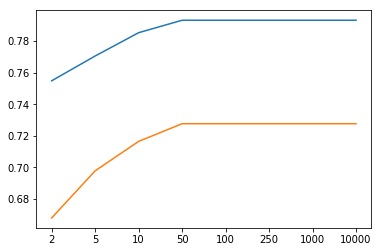

In [15]:
print(lF1Score)
print(lAccuracyScore)
plt.figure()
plt.plot(lF1Score)
plt.plot(lAccuracyScore)
plt.xticks(range(8),lMaxIter)
plt.show()

**What do the results tell you? What would be a good value to set max_iter**, assuming we want a setting that runs long enough for the model to converge but not has wasted cycles. If this behaviour is repeated for other datasets, what does that suggest about max_iter (hint: consider the results and whether a good enough value is acceptable).

> *ANSWER: According to the plot, as `max_iter` increases, F1 score and accuracy also increase but will reach a plateau if `max_iter` is too high. For this dataset, `max_iter = 50` seems to be a good value for the model to converge but not waste cycles.*

**Select what you consider as the best parameter setting for max_iter, and evaluate your model (with this setting) on the test dataset.**

In [16]:
logReg50 = LogisticRegression(C = 1, max_iter = 50)
logReg50.fit(nbaTrainFeat, nbaTrainLabels)
preds = logReg50.predict(nbaTestFeat)

print('F1:', f1_score(preds, nbaTestLabels))
print('Accuracy:', accuracy_score(preds, nbaTestLabels))

F1: 0.7966101694915254
Accuracy: 0.7313432835820896


**Try constructing a few new train-validation-test splits/sets again. Did the best parameter setting change? Does that change your mind about your initial answer?**

In [17]:
nbaTrainFeat, nbaTestFeat, nbaTrainLabels, nbaTestLabels = train_test_split(nbaFeatDf, nbaLabelsDf, test_size = 0.1, random_state = 191)

print(nbaTrainFeat.shape)
print(nbaTestFeat.shape)
print(nbaTrainLabels.shape)
print(nbaTestLabels.shape)

nbaTrainFeat, nbaValFeat, nbaTrainLabels, nbaValLabels = train_test_split(nbaTrainFeat, nbaTrainLabels, test_size = 0.11, random_state = 191)

print(nbaTrainFeat.shape)
print(nbaTrainLabels.shape)
print(nbaValFeat.shape)
print(nbaValLabels.shape)

(1206, 19)
(134, 19)
(1206,)
(134,)
(1073, 19)
(1073,)
(133, 19)
(133,)


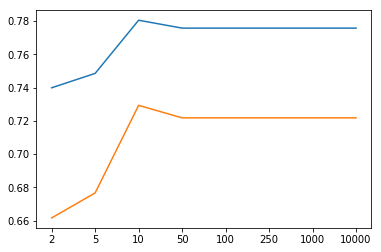

In [18]:
lF1Score = []
lAccuracyScore = []

for maxIter in lMaxIter:
    currLogRegNba = LogisticRegression(C = 1, max_iter = maxIter)
    currLogRegNba.fit(nbaTrainFeat, nbaTrainLabels)
    currPred = currLogRegNba.predict(nbaValFeat)
    lF1Score.append(f1_score(nbaValLabels, currPred))
    lAccuracyScore.append(accuracy_score(nbaValLabels, currPred))
    
plt.figure()
plt.plot(lF1Score)
plt.plot(lAccuracyScore)
plt.xticks(range(8),lMaxIter)
plt.show()

> *ANSWER: As the train/test proportion is changed to 80-10-10, the best parameter has changed from 50 to 10.*